# <Font color = 'brown'><center>Simple Linear Regression in python

## <Font color='blue'> Recap: 'Fitting a line' view
Assumed true linear relationship

**Models Formulation**$$Y=\beta_{0}+\beta_{1}X+\epsilon$$

**'Fitting Line'**: minimize the sum of squared errors (residuals)
    
**Assessing goodness of fit:** $$R^2 = \frac{MSS}{TSS} = 1 - \frac{RSS}{TSS}$$
    
    
 <center>i.e (variability in Y explained by model)/(total variability in Y)
     
$MSS$ - Model Sum of square
     
**Making Predictions:**<br>
For any instance, predict the output as $$\hat{y} = \hat{\beta_{0}}+\hat{\beta{1}}x$$

## <font color='blue'>Assumptions of Simple Linear Regression

Taking more statistical view:<br>
Linear Regression, at each X, finds the best estimate of Y
- At each X, there is a distribution on the values of Y
- Model predicts a single value, therefore there is a distribution of error terms

<div>
<img src="https://reliawiki.org/images/2/28/Doe4.3.png" width='500'>
</div>
    

You are making inferences on the 'population' using a 'sample'. The assumption that variables are linearly dependent is not enough to generalise the results you obtain on a sample to the population, which is much larger in size than the sample. Thus, you need to have certain assumptions in place in order to make inferences.
    
#### <font color='blue'> Assumptions of linear regression:
- Linear relationship between X and Y
- Error terms are normally distributed (not X, Y)
- Error terms are independent of each other
- Error terms have constant variance (homoscendasticity)

*These assumptions allow us to make inferences.*
    
**No assumption on the distribution of X and Y!.**

### <font color='blue'>MCQ's

#### <font color = 'blue'>Question_1:
**Assumptions of Simple Linear Regression**<br><br>
What will be the effect of the error terms not being homoscedastic in nature?
- You will not be able to fit a straight line through the data.
- The error terms will not be normally distributed.
- The inferences made on the model would be unreliable.
- Both B and C.
    

#### <font color = 'blue'>Answer:
**The inferences made on the model would be unreliable.** 
    
Yes! Even if you fit a line through the data, you cannot make inferences about the model. The parameters used to make inferences (which you will study in later segments) will become highly unreliable.

#### <font color = 'blue'>Question_2:
**Assumptions of Simple Linear Regression**<br><br>
Which of the assumptions of linear regression is the following image shown to be violating?
    
<div>
<img src="https://images.upgrad.com/442403e3-721f-47d4-ba65-1659cb1dbd83-XNote_201901101223860.jpg" width='300'>
</div>
 
- The linear relationship between X and y
- Error terms being independent of each other
- Error terms being normally distributed
- Error terms having constant variance
    

#### <font color = 'blue'>Answer:
**Error terms having constant variance** 
    
As is evident from the graph, the error terms seem to be reducing with an increase in the value of X. This is clearly a violation of the assumption that the error terms have constant variance.

#### <font color = 'blue'>Question_2:
**Assumptions of Simple Linear Regression**<br><br>
You saw the following image in the lecture. What all assumptions on the error terms is this image referring to?
    
<div>
<img src="https://reliawiki.org/images/2/28/Doe4.3.png" width='500'>
</div>
 
- The error terms are normally distributed.
- The mean in the distribution of the error terms is zero.
- The error terms have constant variance.
- None of the above
    

#### <font color = 'blue'>Answer:
**1. The error terms are normally distributed.** 
    
Yes. From the image, it is evident that the error terms are normally distributed. But is something missing?
    
**2. The mean in the distribution of the error terms is zero.** 
 
If you look at the image carefully, you will see that the two bell curves shown have a mean of zero. If it is still not clear, think of it like this: The means of each of these normal distributions are shown to be lying on the line. Now, if the error term lies on the line itself, that would mean that the error term is actually zero.

 But are you still missing something?
    
**3. The error terms have constant variance.** 
 
Yes. If you look at the image, in both the distributions, the standard deviation is shown to be sigma, which refers to the assumption that the error terms have a constant variance.
 

---


In this notebook, we'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

## <font color = 'blue'>Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

### <font color='blue'> Importing Librearies

In [50]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd 

# Importing matplotlib and seaborn libreary
import matplotlib.pyplot as plt 
import seaborn as sns

#Importing stats models
import statsmodels.api as sm

# Importing sklearn model
import sklearn
# For train test split
from sklearn.model_selection import train_test_split
# For mean squared error
from sklearn.metrics import mean_squared_error
# for Rsquare
from sklearn.metrics import r2_score
# for Linear regression class
from sklearn.linear_model import LinearRegression

In [2]:
# Read the given CSV file, and view some sample records

advertising = pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Let's inspect the various aspects of our dataframe

In [3]:
#checking the shape of the dataframe

advertising.shape

(200, 4)

In [4]:
#checking the info() of the dataframe

advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
#checking the numarical summary of the dataframe

advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


---

## <font color='blue'>Step 2: Visualising the Data

Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to `Sales`.

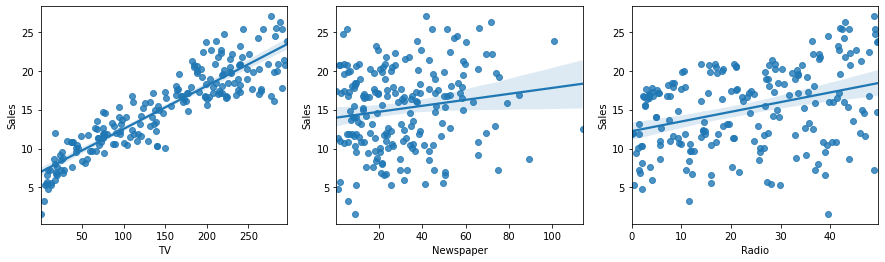

In [6]:
# plotting the regression plot for ['TV','Newspaper', 'Radio'] vs Sales'

plt.figure(figsize=[15,4])
plt.subplot(1,3,1)
sns.regplot(x="TV",y="Sales",data=advertising)
plt.subplot(1,3,2)
sns.regplot(x="Newspaper",y="Sales",data=advertising)
plt.subplot(1,3,3)
sns.regplot(x="Radio",y="Sales",data=advertising);

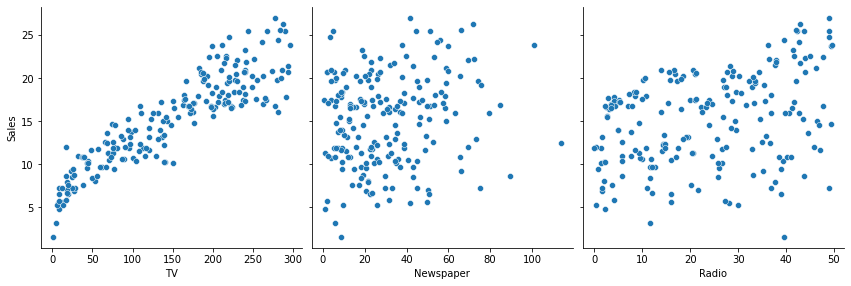

In [7]:
# plotting scater plot for ['TV','Newspaper', 'Radio'] vs Sales'

sns.pairplot(data=advertising,x_vars=['TV','Newspaper', 'Radio'],y_vars='Sales',size=4, aspect=1,diag_kind=None);

In [8]:
#Checking the correlation matrix for all the columns

advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


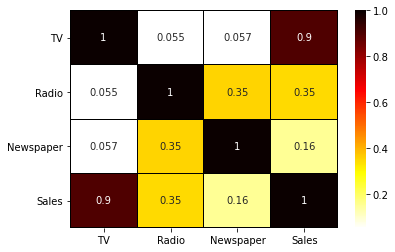

In [9]:
# plotting the correlation heatmap 

sns.heatmap(advertising.corr(), cmap="hot_r",
            annot = True,linewidths=0.01,linecolor='black');

As is visible from the pairplot and the heatmap, the variable `TV` seems to be most correlated with `Sales`. So let's go ahead and perform simple linear regression using `TV` as our feature variable.

---

## <font color='blue'> Hypothesis Testing in Linear Regression

Before building a model,  there is still one theoretical aspect left to be addressed: the significance of the derived beta coefficient. When you fit a straight line through the data, you'll obviously get the two parameters of the straight line, i.e. the intercept $(\beta_{0})$ and the slope $(\beta_{1})$. Now, while $\beta_{0}$ is not of much importance right now,but there are a few aspects surrounding that need to be checked and verified.
   
The first question we ask is, "Is the beta coefficient significant?" What does this mean?

Suppose you have a dataset for which the scatter plot looks like the following:

<div>
<img src="https://images.upgrad.com/4548a374-4fe7-4016-86a1-5bcf92a08e21-20190110122767.jpg" width="300">
</div>

Now, if you run a linear regression on this dataset in Python, it will fit a line on the data which, say, looks like the following:

<div>
<img src="https://images.upgrad.com/619da79f-5a07-49ee-acef-3f91ab74cf41-20190110122837.jpg" width="300">
</div>

Now, you can clearly see that the data is randomly scattered and doesn't seem to follow a linear trend or any trend, in general. But Python will anyway fit a line through the data using the least squared method. But you can see that the fitted line is of no use in this case. 

Hence, every time you perform a linear regression, you need to test whether the fitted line is a significant one or not or to simply put it, you need to test whether $\beta_{1}$ is significant or not. And in comes the idea of Hypothesis Testing on 
$\beta_{1}$

**You start by saying that $\beta_{1}$ is not significant**, i.e. there is no relationship between X and y.
So in order to perform the hypothesis test, we first propose the null hypothesis that $\beta_{1}$ is 0. And the alternative hypothesis thus becomes $\beta_{1}$ is not zero.

- **Null Hypothesis $(H_{0}):\beta_{1} = 0$**, $\beta_{1}$ is insignificant i.e. there is no relationship between X and y
- **Alternate Hypothesis $(H_{A}):\beta_{1} \ne 0$**, $\beta_{1}$ is significant i.e. there is some relationship between X and y


Let's first discuss the implications of this hypothesis test. If you fail to reject the null hypothesis that would mean that $\beta_{1}$ is zero which would simply mean that $\beta_{1}$ is insignificant and of no use in the model. Similarly, if you reject the null hypothesis, it would mean that $\beta_{1}$ is not zero and the line fitted is a significant one.

Now, how do you perform the hypothesis test? Recall from your hypothesis testing module that you first used to compute the t-score (which is very similar to the Z-score) which is given by $\frac{X-\mu}{s/\sqrt{n}}$ where $\mu$ is the population mean and $s$ is the sample standard deviation which when divided by $\sqrt{n}$ is also known as standard error. 

Using this, the t-score for $\hat{\beta_{1}}$ comes out to be (since the null hypothesis is that $\beta_{1}$ is equal to zero):


$$\frac{\hat{\beta_{1}}-0}{SE(\hat{\beta_{1}})}$$


Now, in order to perform the hypothesis test, you need to derive the p-value for the given beta. If you're hazy on what p-value is and how it is calculated, it is recommended that you revisit the segment on p-value. Please note that the formula of $SE(\beta_{1})$ provided in the t-score above is out of scope of this course.

Let's do a quick recap of how do you calculate p-value anyway:
- Calculate the value of t-score for the mean point (in this case, zero, according to the Null hypothesis that we have stated) on the distribution
- Calculate the **p-value** from the cumulative probability for the given t-score using the t-table
- Make the decision on the basis of the p-value with respect to the given value of $\beta$ (significance level)

Now, if the p-value turns out to be less than 0.05, you can reject the null hypothesis and state that $\beta_{1}$ is indeed significant.

Please note that all of the above steps will be performed by Python automatically

### <font color='blue'>MCQ's

#### <font color = 'blue'>Question_1:
**Hypothesis Test**<br><br>
What does it mean if you fail to reject the Null hypothesis in the case of simple linear regression?
- β₁ and thus, the independent variable it is associated with is significant in the prediction of the dependent variable. 
- β₁ and thus, the independent variable it is associated with is insignificant in the prediction of the dependent variable. 
- β₀ and thus, the independent variable it is associated with is significant in the prediction of the dependent variable. 
- β₀ and thus, the independent variable it is associated with is insignificant in the prediction of the dependent variable. 
    

#### <font color = 'blue'>Answer:
**β₁ and thus, the independent variable it is associated with is insignificant in the prediction of the dependent variable.** 
    
Correct! The Null Hypothesis in simple linear regression is:
    
    β₁ = 0
    
Thus, if we fail to reject the Null hypothesis, it means that β₁ is indeed zero, and thus insignificant for the prediction of the dependent variable.
    

#### <font color = 'blue'>Question_2:
**P-value**<br><br>
Which of the following is used to calculate the p-value for a particular beta coefficient?
- The standard error of the beta coefficient
- The t-statistic of the beta coefficient 
- The null hypothesis for the beta coefficient
- None of the above
    

#### <font color = 'blue'>Answer:
**The t-statistic of the beta coefficient** 
    
The t-statistic along with the t-distribution table is used to determine the p-value of the coefficient.

#### <font color = 'blue'>Question_3:
**Distribution of the Error Terms**<br><br>
If the sample size is small, i.e. less than 30, which of the following distribution is used to describe the error terms?
- Normal distribution
- Uniform distribution
- T-distribution
- Both A and C
    

#### <font color = 'blue'>Answer:
**T-distribution** 
    
Correct! In case of a small sample size, we use a t-distribution which is very similar to a normal distribution.

#### <font color = 'blue'>Question_4:
**T-score**<br><br>
Suppose that for a linear model, you got β₁ as 0.5. Also, the standard error of β₁ was found out to be 0.02. What will be the value of t-score for β₁?
- 2.5
- 25
- 0.04
- 0.4
    

#### <font color = 'blue'>Answer:
**25** 
    
Recall that the t-score for β₁ is given as $\frac{\hat{\beta_{1}}-0}{SE(\hat{\beta_{1}})}$.
    
Hence, you have:
    
$t-score = \frac{0.5}{0.02} = 25$

#### <font color = 'blue'>Question_5:
**Significance of Beta**<br><br>
From the t-score you got in the previous question, what can you say about the significance of β₁?
- β₁ is significant.
- β₁ is insignificant.
- Can't be said.
    

#### <font color = 'blue'>Answer:
**β₁ is significant.** 
    
Correct! Recall that a t-distribution is very similar to a normal distribution. And a value as big as 25 means a practically zero p-value which in turn means that the variable is significant. You can have a look at the t-table [here](https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf) anyway. And you'll anyway see this in the Python demo in the next segment.

---

## <font color='blue'>Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or <font color = 'blue'>**model parameters**.


### <font color='blue'>Generic Steps in model building using `statsmodels`

- Create X and y
- Create train and test sets (70-30, 80-20)
- Train your model on the training set (i.e. learn the coefficients)
- Evaluate the model (training set, test set)

We first assign the feature variable, `TV`, in this case, to the variable `X` and the response variable, `Sales`, to the variable `y`.

In [10]:
# create X and y

X = advertising['TV'] # use uppercase X - because X(predictor variables) is usually dataframe which consist of multiple colomns
y = advertising['Sales'] # use lowercase y - because y(predicting variable) is usually single column or data series

# This naming Convention(X,y) is conventionaly used in ML

#### <font color='blue'>Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [12]:
X_train.shape

(140,)

In [13]:
X_test.shape

(60,)

In [14]:
# Let's now take a look at the train dataset

X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [15]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

#### <font color='blue'>Building a Linear Model

You first need to import the `statsmodel.api` library using which you'll perform the linear regression.

In [16]:
import statsmodels.api as sm

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [17]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
    
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [18]:
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [19]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [20]:
# Performing a summary operation lists out all the different parameters of the regression line fitted

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 20 Oct 2021   Prob (F-statistic):           1.52e-52
Time:                        14:43:47   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

####  <font color='blue'>Looking at some key statistics from the summary

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

##### 1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance. 

##### 2. R - squared is 0.816
Meaning that 81.6% of the variance in `Sales` is explained by `TV`

This is a decent R-squared value.

###### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

### <font color='blue'>Summary Statistics
    
Now, let's take a look at the summary statistics that was outputted by the model again.<br>
#### <font color='blue'>F-statistic:
Now introducing the new term named **F-statistic and Prob(F-statistic)**. Now, recall that in the last segment, you did a hypothesis test for beta to determine whether or not the coefficient $\beta_{1}$ outputted by the model was significant or not. Now, F-statistic is similar in the sense that now instead of testing the significance of each of the betas, it tells you whether the overall model fit is significant or not. This parameter is examined because many a time it happens that even though all of your betas are significant, but your overall model fit might happen just by chance.
    

The heuristic is similar to what you learnt in the normal p-value calculation as well. If the **'Prob (F-statistic)' is less than 0.05**, you can conclude that the overall model fit is significant. If it is greater than **0.05**, you might need to review your model as the fit might be by chance, i.e. the line may have just luckily fit the data. In the image above, you can see that the p-value of the F-statistic is **1.52e-52**  which is practically a **zero value**. This means that the model for which this was calculated is definitely significant since it is less than **0.05**.
    

This will be more appreciable when you study multiple linear regression since there you have a lot of betas for the different predictor variables and thus it is very helpful in determining if all the predictor variables together as a whole are significant or not or simply put, it tells you whether the model fit as a whole is significant or not. 
    
    
#### <font color='blue'>R-squared:
R-squared value tells you exactly how much variance in the data has been explained by the model. In our case, the R-squared is about 0.816 which means that the model is able to explain 81.6% of the variance which is pretty good.
    
    
#### <font color='blue'>Coefficients and p-values:
The p-values of the coefficients (in this case just one coefficient for TV) tell you whether the coefficient is significant or not. In this case, the coefficient of TV came out to be **0.0545** with a standard error of about **0.002**. Thus, you got a t-value of **24.722** which lead to a practically **zero p-value**. Hence, you can say that your coefficient is indeed significant. 

 

Apart from this, the summary statistics outputs a few more metrics which are not of any use as of now. But you'll learn about some more of them in multiple linear regression.

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Sales = 6.948 + 0.054 \times TV $

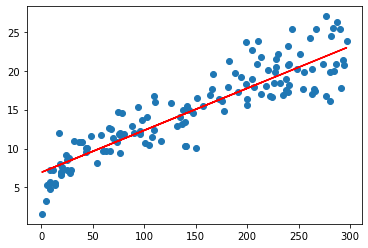

In [21]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

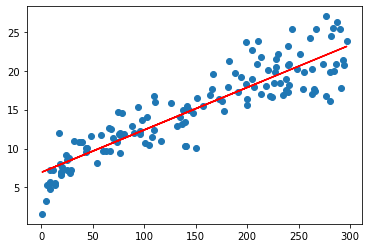

In [22]:
# Taking the coefficient from params method

plt.scatter(X_train,y_train)
plt.plot(X_train,lr.params[0] + lr.params[1]*X_train,'r');

### <font color='blue'>MCQ's

#### <font color = 'blue'>Question_1:
**Viewing The Coefficients**<br><br>
Which of the following commands can be used to view β₀ and β₁ once you have fitted the line using statsmodels? The name of your linear regression object is lr. (More than one option(s) may be correct.)
- lr.OLS()
- lr.params
- lr.summary()
    

#### <font color = 'blue'>Answer:
**1. lr.params** 
    
You can view both the parameters using this simple command.
    
**2. lr.summary()** 
    
The summary() function also outputs the values of coefficients and hence, can be used to view these values as well.

#### <font color = 'blue'>Question_2:
**Summary Statistics**<br><br>
Suppose you built a linear regression model in which the target variable is 'Scaled Pressure' which is being predicted with the help of the feature variable 'Frequency', and you got the following summary statistics of the model that you built.
    
<div>
<img src="https://images.upgrad.com/8d7a7cfa-1f73-42c7-ae39-5365ad6630b0-summary.PNG" width='500'>
</div>
Looking at the summary statistics given above, what can be said about the significance of the overall model fit?

- The overall model fit is significant
- The overall model fit is not significant
- Can't be determined
    

#### <font color = 'blue'>Answer:
**The overall model fit is significant** 
    
If you look at the summary statistics, you can see that the F-statistic has a value of 270.2 which is a very high value and this, the Prob(F-statistic) is 5.93e-56 (as shown in the table) which is a practically zero value. Hence, the value of less than 0.05 which means that the overall model fit is significant.

#### <font color = 'blue'>Question_3:
**Summary Statistics**<br><br>
Let's take a look at the summary statistics you saw in the last question again.
    
<div>
<img src="https://images.upgrad.com/c34c4247-ba7e-4b12-afa9-04ca7e2dc8b5-summary.PNG" width='500'>
</div>
What can you say about the significance of the coefficient the variable 'Frequency'?

- The p-value of the coefficient for frequency is low and hence, it is insignificant.
- The p-value of the coefficient for frequency is low and hence, it is significant.
- The p-value of the coefficient for frequency is high and hence, it is insignificant.
- The p-value of the coefficient for frequency is high and hence, it is significant.
    

#### <font color = 'blue'>Answer:
**The p-value of the coefficient for frequency is low and hence, it is significant.** 
    
If you look at the table, you can see that the p-value for the coefficient of the variable 'Frequency' is 0 which is a low value and hence, the coefficient is significant.

#### <font color = 'blue'>Question_4:
**Summary Statistics**<br><br>
Finally, looking at the following summary statistics, what can you say about the extent of fit, i.e. the variance explanatory power of the model?
    
<div>
<img src="https://images.upgrad.com/52d434b5-24f7-4391-9e91-5fde14d76ab6-summary.PNG" width='500'>
</div>


- The R-squared value is high and hence, the model doesn't explain much of the variance.
- The R-squared value is high and hence, the model explains a lot of the variance.
- The R-squared value is low and hence, the model doesn't explain much of the variance.
- The R-squared value is low and hence, the model does explain a lot of the variance.
    

#### <font color = 'blue'>Answer:
**The R-squared value is low and hence, the model doesn't explain much of the variance.** 
    
If look at the summary statistics closely. The value of R-squared is 0.153. Recall that R-squared varies from 0 to 1 wherein a value of 0 implies that none of the variance in the data is explained and a value of 1 implies that all of the variance in the data is explained. Can you answer the question now? Hence, a value of 0.153 is a low value of R-squared which in turn implies that the model doesn't explain much variance present in the data.

---

## <font color='blue'>Step 4: Residual analysis 
To validate assumptions of the model, and hence the reliability for inference


#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [23]:
# Creating residual from the predicted model "X-train_sm"

y_train_pred = lr.predict(X_train_sm)     # Creating y_train_pred(best fitting line) using X_train_sm (already created model)
res = (y_train - y_train_pred)            # residual is difference between the actual point to best fitting line
res

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
         ...   
87     3.013102
103    2.502170
67    -1.146907
24    -0.646884
8     -2.617777
Length: 140, dtype: float64

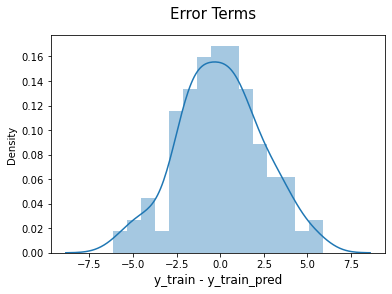

In [24]:
# Plotting the histogram to check whether the error terms is normally distributed

fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 12)         # X-label
plt.show()

In [27]:
# Checking the res using describe()

round(res.describe(),2)

count    140.00
mean       0.00
std        2.41
min       -6.16
25%       -1.60
50%       -0.02
75%        1.64
max        5.90
dtype: float64

The residuals are following the normally distributed with a mean 0. All good!

#### Looking for patterns in the residuals

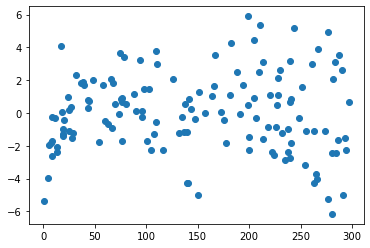

In [26]:
# Plotting the scatter plot x axis as 'X_train' and y axis as 'res'

plt.scatter(X_train,res)
plt.show()

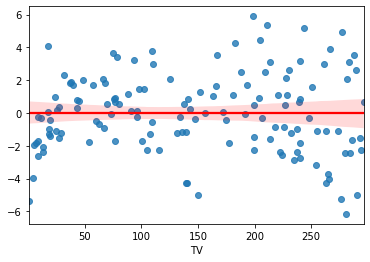

In [28]:
# plotting the reg plot to conform the mean is 0 

sns.regplot(X_train,res,line_kws={"color":'red'});

# Here the best fit line is y = 0 which means the residual mean is 0

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

---

## <font color='blue'>Step 5: Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

---

In [39]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

In [40]:
y_test_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the RMSE

In [41]:
#Returns the mean squared error; we'll take a square root

np.sqrt(mean_squared_error(y_test, y_test_pred))

2.0192960089662337

###### Checking the R-squared on the test set

In [42]:
# R2 for test dataset
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.7921031601245656

In [43]:
# R2 for train dataset
r_squared = r2_score(y_train, y_train_pred)
r_squared

0.8157933136480389

##### Visualizing the fit on the test set

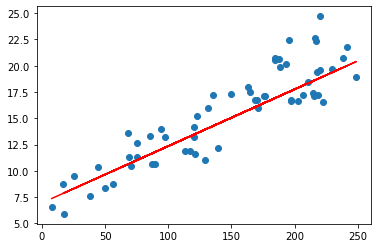

In [44]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

### <font color='blue'>MCQ's

#### <font color = 'blue'>Question_1:
**Residual Analysis**<br><br>
Plotting a histogram of the residuals helps you determine: (More than one option may be correct.).
    

- If the error terms are normally distributed
- If the error terms are centred around zero
- If there are any visible patterns in the error terms
    

#### <font color = 'blue'>Answer:
**1. If the error terms are normally distributed** 
    
A histogram of the error terms is plotted to check if the error terms are normally distributed.
    
**2. If the error terms are centred around zero** 
    
While the histogram tells you whether the error terms are normally distributed or not, it also helps you check if they are centred around zero which is quite crucial.

#### <font color = 'blue'>Question_2:
**Model Comparison Using RMSE**<br><br>
You fit two linear regression models for the same data, where the first one gives an RMSE value of 3.78, and the second returns a value of 6.33. Which of these is a better model?
    

- The first one
- The second one
- Both are the same
- Can’t say
    

#### <font color = 'blue'>Answer:
**The first one** 
    
RMSE (Root Mean Squared Error) is a metric that tells you the deviation of the predicted values by a model from the actual observed values. So, since it is a sort of error term, it is better to have a low RMSE.

Notice that the RMSE for the first model is lesser than the second model. So naturally, this model would be better than the other.

#### <font color = 'blue'>Question_3:
**Model Comparison Using R-squared**<br><br>
For the two linear regression models mentioned in the last question, the R-squared values in the train and test sets are as follows:

|Model|R-squared (on train set)|R-squared (on test set)|
|:--|:--|:--|
|First Model|0.85|0.61|
|Second Model|0.74|0.72|
    
Which of these do you think is a better model?
- The first model
- The second model
- Both are the same
    

#### <font color = 'blue'>Answer:
**The second model** 
    
The second model seems to be a better one because even though the R-squared for the first model is quite good on the train set, but it drops tremendously in the test set. This simply means that the first model is not generalising well whereas in the case of the second model we have decent and close values of R-squared for both the train and test sets.

 ---

### <font color='blue'>Linear Regression using `linear_model` in `sklearn`

Apart from `statsmodels`, there is another package namely `sklearn` that can be used to perform linear regression. We will use the `linear_model` library from `sklearn` to build the model. Since, we hae already performed a train-test split, we don't need to do it again.

There's one small step that we need to add, though. When there's only a single feature, we need to add an additional column in order for the linear regression fit to be performed successfully.

In [52]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [53]:
# sklearn need a series a shape of 2D array like (140,1), which means ateleast one column required apart from variable
X_train_lm.shape

(140,)

In [47]:
# reshaping to (140,1)

X_train_lm = X_train_lm.reshape(-1,1) # -1 for, all the rows
X_test_lm = X_test_lm.reshape(-1,1)

AttributeError: 'Series' object has no attribute 'reshape'

In [54]:
# syntax for reshape singlecolumn.values.reshape(-1,1)
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1) 

In [55]:
print(X_train_lm.shape)
print(y_train_lm.shape)
print(X_test_lm.shape)
print(y_test_lm.shape)

(140, 1)
(140,)
(60, 1)
(60,)


In [56]:
X_train_lm

array([[213.4],
       [151.5],
       [205. ],
       [142.9],
       [134.3],
       [ 80.2],
       [239.8],
       [ 88.3],
       [ 19.4],
       [225.8],
       [136.2],
       [ 25.1],
       [ 38. ],
       [172.5],
       [109.8],
       [240.1],
       [232.1],
       [ 66.1],
       [218.4],
       [234.5],
       [ 23.8],
       [ 67.8],
       [296.4],
       [141.3],
       [175.1],
       [220.5],
       [ 76.4],
       [253.8],
       [191.1],
       [287.6],
       [100.4],
       [228. ],
       [125.7],
       [ 74.7],
       [ 57.5],
       [262.7],
       [262.9],
       [237.4],
       [227.2],
       [199.8],
       [228.3],
       [290.7],
       [276.9],
       [199.8],
       [239.3],
       [ 73.4],
       [284.3],
       [147.3],
       [224. ],
       [198.9],
       [276.7],
       [ 13.2],
       [ 11.7],
       [280.2],
       [ 39.5],
       [265.6],
       [ 27.5],
       [280.7],
       [ 78.2],
       [163.3],
       [213.5],
       [293.6],
       [

### <font color='blue'>Steps in sklearn model building
- Create an object of linear regression
- fit the model
- see the params, make predictions (train, test)
- evaluate (r2, etc.)

In [57]:
from sklearn.linear_model import LinearRegression

# 1. Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# 2. Fit the model using lr.fit()
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [58]:
help(lm)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean

In [59]:
# 3. see the params, make predictions (train, test)

print(lm.intercept_)
print(lm.coef_)

6.94868320000136
[0.05454575]


In [60]:
# make predictions

y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [61]:
# 4. Evaluate the model by looking the r2 value

print(r2_score(y_train_lm,y_train_pred))
print(r2_score(y_test_lm,y_test_pred))

0.8157933136480388
0.792103160124566


The equationwe get is the same as what we got before!

$ Sales = 6.948 + 0.054 \times TV $

Sklearn linear model is useful as it is compatible with a lot of sklearn utilites (cross validation, grid search etc.)

 ## <font color='blue'>MCQ's

#### <font color = 'blue'>Question_1:
**Parameters in SKLearn**<br><br>
Which of these commands will give you the value of  slope for the fitted model?

- lm.fit
- lm.intercept_
- lm.coef_
    

#### <font color = 'blue'>Answer:
**lm.coef_** 
    
**lm.coef_** gives you the value of $\beta_{1}$ which is the slope of the fitted line.

---
## <font color="blue">Summary
    
In this session, you built a simple linear regression model in Python using the advertising dataset. You also saw some more theoretical aspects in between. Here's a brief of what you learnt in this session.

1. A quick recap of simple linear regression
    
    
2. Assumptions of simple linear regression
    1. Linear relationship between X and y.
    2. Normal distribution of error terms.
    3. Independence of error terms.
    4. Constant variance of error terms.
    
    
3. Hypothesis testing in linear regression
    1. To determine the significance of beta coefficients.
    2. $H_{0}:\beta_{1}=0;H_{A}:\beta_{1}\ne0$
    3. T-test on the beta coefficient.
    4. $t score = \frac{\hat{\beta_{i}}-0}{SE(\hat{\beta_{i}})}$

    
4. Building a linear model
    1. OLS (Ordinary Least Squares) method in statsmodels to fit a line.
    2. Summary statistics
        1. F-statistic, R-squared, coefficients and their p-values.
    
    
5. Residual Analysis
    1. Histogram of the error terms to check normality.
    2. Plot of the error terms with X or y to check independence.

    
6. Predictions
    1. Making predictions on the test set using the 'predict()' function.

    
7. Linear Regression using SKLearn
    1. A second package apart from statsmodels for linear regression.
    2. A more hassle-free package to just fit a line without any inferences.

---
## Addressing some common questions/doubts on Simple Linear Regression

### Q: Why is it called 'R-squared'?

Based on what we learnt so far, do you see it? Can you answer this?
 
 
 
 
 
 

.

.
 
.

.
 
  #### Drumroll...
  
.
 
.

.

.

In [29]:
corrs = np.corrcoef(X_train, y_train)
print(corrs)

[[1.         0.90321277]
 [0.90321277 1.        ]]


In [30]:
corrs[0,1] ** 2

0.8157933136480386

Correlation (Pearson) is also called **"r"** or **"Pearson's R"**

### Q: What is a good RMSE? Is there some RMSE that I should aim for?

<br>

<br>

You should be able to answer this by now!


<br>


<br>



Look at "Sharma ji ka beta"; he could answer this in a moment. How lucky is Sharma ji to have such a smart kid!

.

.
 
.

.
 
  #### Drumroll...
  
.
 
.

.

.

The RMSE:
 - depends on the units of the Y variables
 - is NOT a normalized measure
 
While it can't really tell you of the gooodness of the particular model, it can help you compare models. 

A better measure is R squared, which is normalized.

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

### Q: Does scaling have an impact on the model? When should I scale?

<br>
<br>
<br>
<br>
<br>
<br>

While the true benefits of scaling will be apparent during future modules, at this juncture we can discuss if it has an impact on the model.

We'll rebuild the model after scaling the predictor and see what changes.

The most popular methods for scaling:
1. Min-Max Scaling
2. Standard Scaling

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

#### SciKit Learn has these scaling utilities handy

In [63]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [67]:
# One aspect that you need to take care of is that the 'fit_transform' can be performed on 2D arrays only. So you need to
# reshape your 'X_train_scaled' and 'y_trained_scaled' data in order to perform the standardisation.
X_train_scaled = X_train.values.reshape(-1,1)
y_train_scaled = y_train.values.reshape(-1,1) 

In [68]:
X_train_scaled.shape

(140, 1)

In [69]:
# Create a scaler object using StandardScaler()
scaler = StandardScaler()
#'Fit' and transform the train set; and transform using the fit on the test set later
X_train_scaled = scaler.fit_transform(X_train_scaled)
y_train_scaled = scaler.fit_transform(y_train_scaled)

In [70]:
print("mean and sd for X_train_scaled:", np.mean(X_train_scaled), np.std(X_train_scaled))
print("mean and sd for y_train_scaled:", np.mean(y_train_scaled), np.std(y_train_scaled))

mean and sd for X_train_scaled: 2.5376526277146434e-17 0.9999999999999999
mean and sd for y_train_scaled: -2.5376526277146434e-16 1.0


In [71]:
# Let's fit the regression line following exactly the same steps as done before
X_train_scaled = sm.add_constant(X_train_scaled)

lr_scaled = sm.OLS(y_train_scaled, X_train_scaled).fit()

In [72]:
# Check the parameters
lr_scaled.params

array([-2.68882139e-16,  9.03212773e-01])

As you might notice, the value of the parameters have changed since we have changed the scale.

Let's look at the statistics of the model, to see if any other aspect of the model has changed.

In [73]:
print(lr_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 20 Oct 2021   Prob (F-statistic):           1.52e-52
Time:                        16:21:12   Log-Likelihood:                -80.233
No. Observations:                 140   AIC:                             164.5
Df Residuals:                     138   BIC:                             170.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.689e-16      0.037  -7.36e-15      1.0

#### Model statistics and goodness of fit remain unchanged.

##### So why scale at all?
- Helps with interpretation (we'll be able to appreciate this better in later modules)
- Faster convergence of gradient descent